# Supervised learning model tracking the progression of diabetes after one year

In [2]:
# NUMERICAL & DATA HANDLING
import numpy as np
import pandas as pd

# Ensure consistent print/display options
pd.set_option("display.max_columns", None)
pd.set_option("display.precision", 3)

# DATA VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns

# Use inline plots in Jupyter
%matplotlib inline

# Set default visualization style
sns.set_theme(style="whitegrid")

# MACHINE LEARNING (scikit-learn)
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
# Loading the dataset from sklearn datasets
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target # adding the target variable
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038,0.051,0.062,0.022,-0.044,-0.035,-0.043,-0.003,0.020,-0.018,151.0
1,-0.002,-0.045,-0.051,-0.026,-0.008,-0.019,0.074,-0.039,-0.068,-0.092,75.0
2,0.085,0.051,0.044,-0.006,-0.046,-0.034,-0.032,-0.003,0.003,-0.026,141.0
3,-0.089,-0.045,-0.012,-0.037,0.012,0.025,-0.036,0.034,0.023,-0.009,206.0
4,0.005,-0.045,-0.036,0.022,0.004,0.016,0.008,-0.003,-0.032,-0.047,135.0


`The data is already scaled, there is no need to apply standard scaler later on before training.`

## Exploratory Data Analysis

In [6]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns \nIts shape is:{df.shape}")

The dataset has 442 rows and 11 columns 
Its shape is:(442, 11)


In [7]:
print("Some key information about the data:\n")
print(df.info())

Some key information about the data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None


`From the data it is clear there are no nulls and all data points are float numbers which is fine so far.`

In [9]:
df.describe() # key statistics about the data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420e+02,4.420e+02,4.420e+02,4.420e+02,4.420e+02,4.420e+02,4.420e+02,4.420e+02,4.420e+02,4.420e+02,442.000
mean,-2.512e-19,1.231e-17,-2.246e-16,-4.798e-17,-1.381e-17,3.918e-17,-5.777e-18,-9.043e-18,9.294e-17,1.130e-17,152.133
std,4.762e-02,4.762e-02,4.762e-02,4.762e-02,4.762e-02,4.762e-02,4.762e-02,4.762e-02,4.762e-02,4.762e-02,77.093
min,-1.072e-01,-4.464e-02,-9.028e-02,-1.124e-01,-1.268e-01,-1.156e-01,-1.023e-01,-7.639e-02,-1.261e-01,-1.378e-01,25.000
25%,-3.730e-02,-4.464e-02,-3.423e-02,-3.666e-02,-3.425e-02,-3.036e-02,-3.512e-02,-3.949e-02,-3.325e-02,-3.318e-02,87.000
50%,5.383e-03,-4.464e-02,-7.284e-03,-5.670e-03,-4.321e-03,-3.819e-03,-6.584e-03,-2.592e-03,-1.947e-03,-1.078e-03,140.500
75%,3.808e-02,5.068e-02,3.125e-02,3.564e-02,2.836e-02,2.984e-02,2.931e-02,3.431e-02,3.243e-02,2.792e-02,211.500
max,1.107e-01,5.068e-02,1.706e-01,1.320e-01,1.539e-01,1.988e-01,1.812e-01,1.852e-01,1.336e-01,1.356e-01,346.000


In [10]:
df['target'].value_counts().sort_values(ascending=False).head().rename_axis('Target').reset_index(name='Occurrences')

,Target,Occurrences
0,200.0,6
1,72.0,6
2,90.0,5
3,178.0,5
4,71.0,5


`There are some repititions of elements in the data with 200 and 72 being the most occuring elements.`

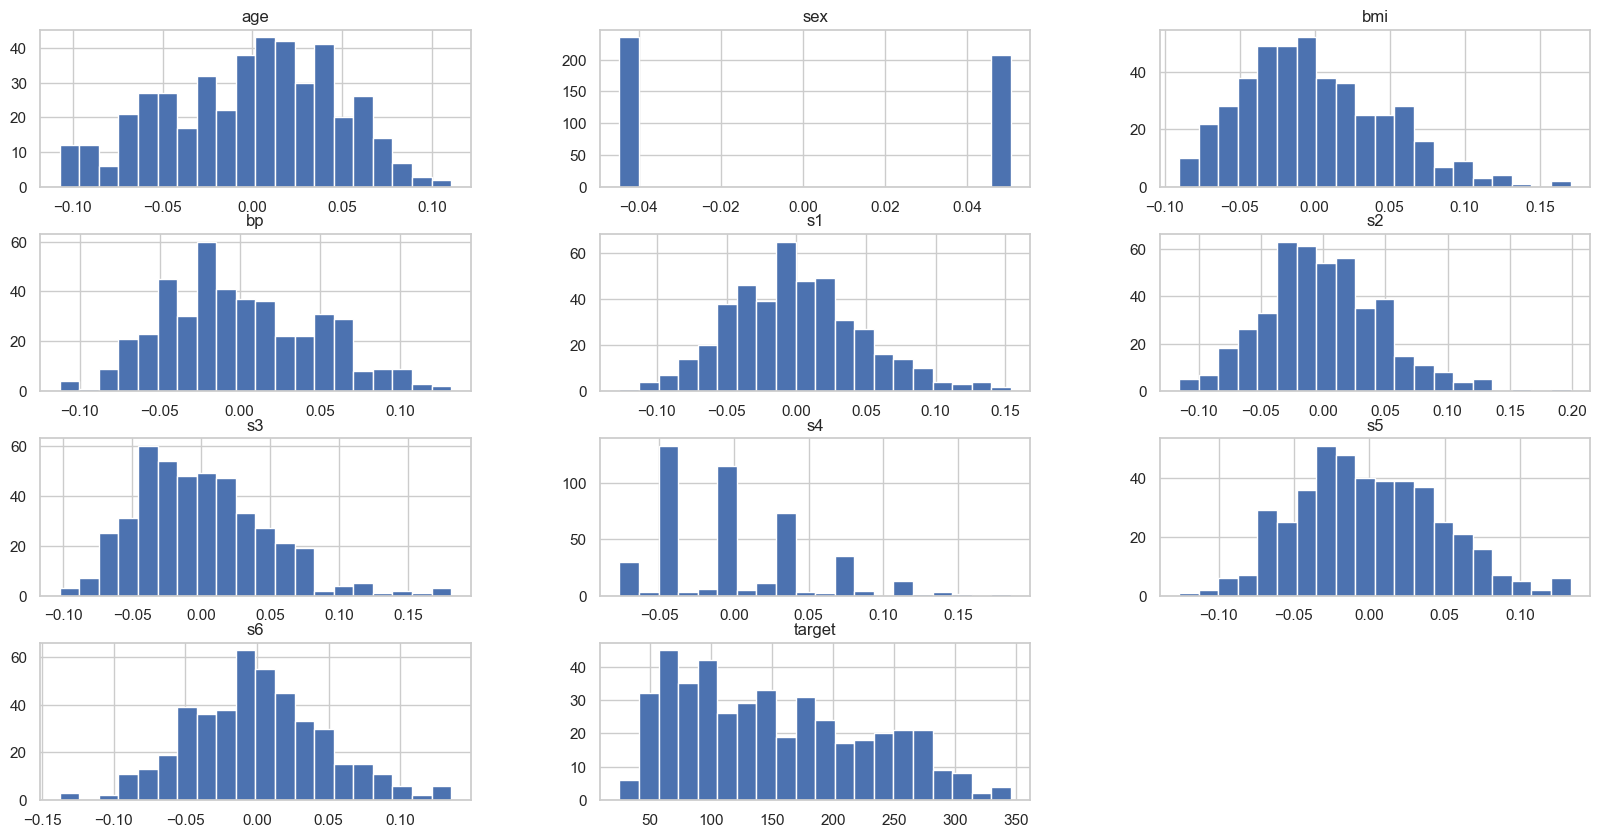

In [12]:
plt.rcParams['figure.figsize']=(20, 10) # standard figure size for the diagrams
df.hist(bins=20)
plt.show()

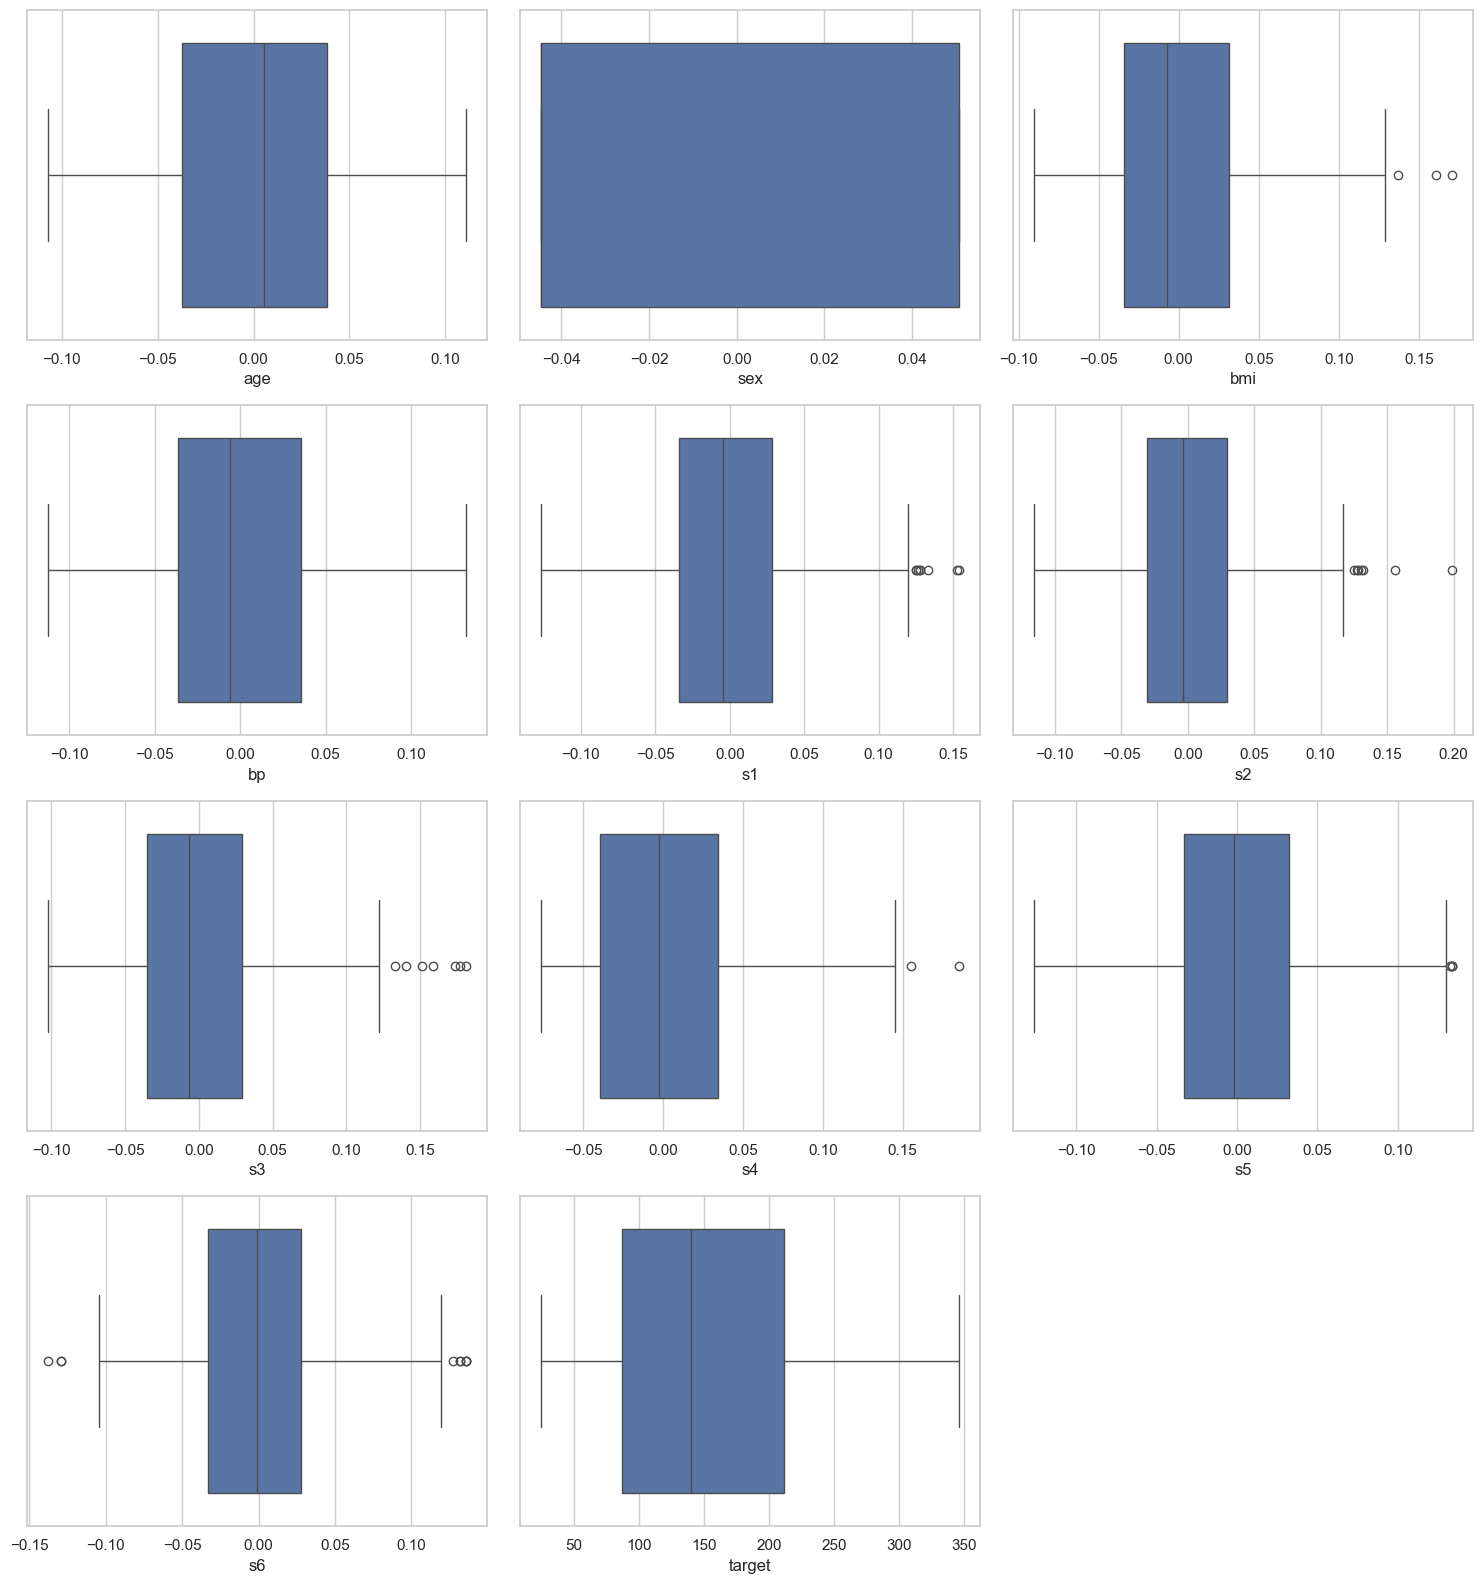

In [13]:
# Check for outliers using boxplots

import math

def boxplot_plots():
    features = df.columns
    n = len(features)

    cols = 3
    rows = math.ceil(n / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        sns.boxplot(x=feature, data=df, ax=axes[i])

    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

boxplot_plots()

`From the boxplots and histograms the following was observed:`

- The data is generally right skewed.
- Most data points are within are captured by the IQR with few outliers skewing data to the right on average.
- The outliers are not extremely bad(moderately skewed) to affect the model performance upon training.

The outliers are not extreme and as such there will not be a need to cap them before training the project.

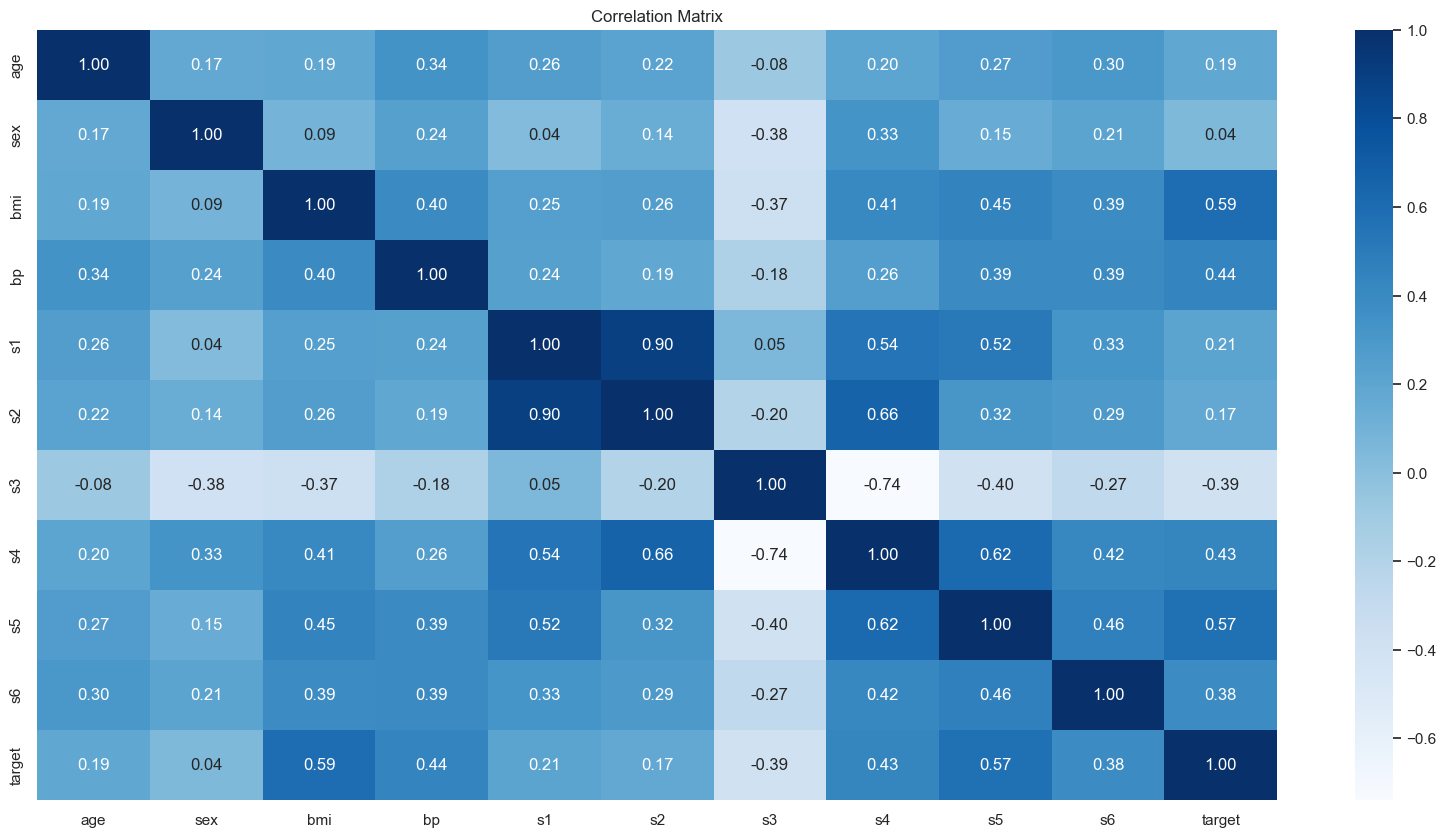

In [15]:
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='Blues')
plt.title("Correlation Matrix")
plt.show()

In [16]:
correlation['target'].sort_values(ascending=False) # correlation of features vs the target variable

target    1.000
bmi       0.586
s5        0.566
bp        0.441
s4        0.430
s6        0.382
s1        0.212
age       0.188
s2        0.174
sex       0.043
s3       -0.395
Name: target, dtype: float64

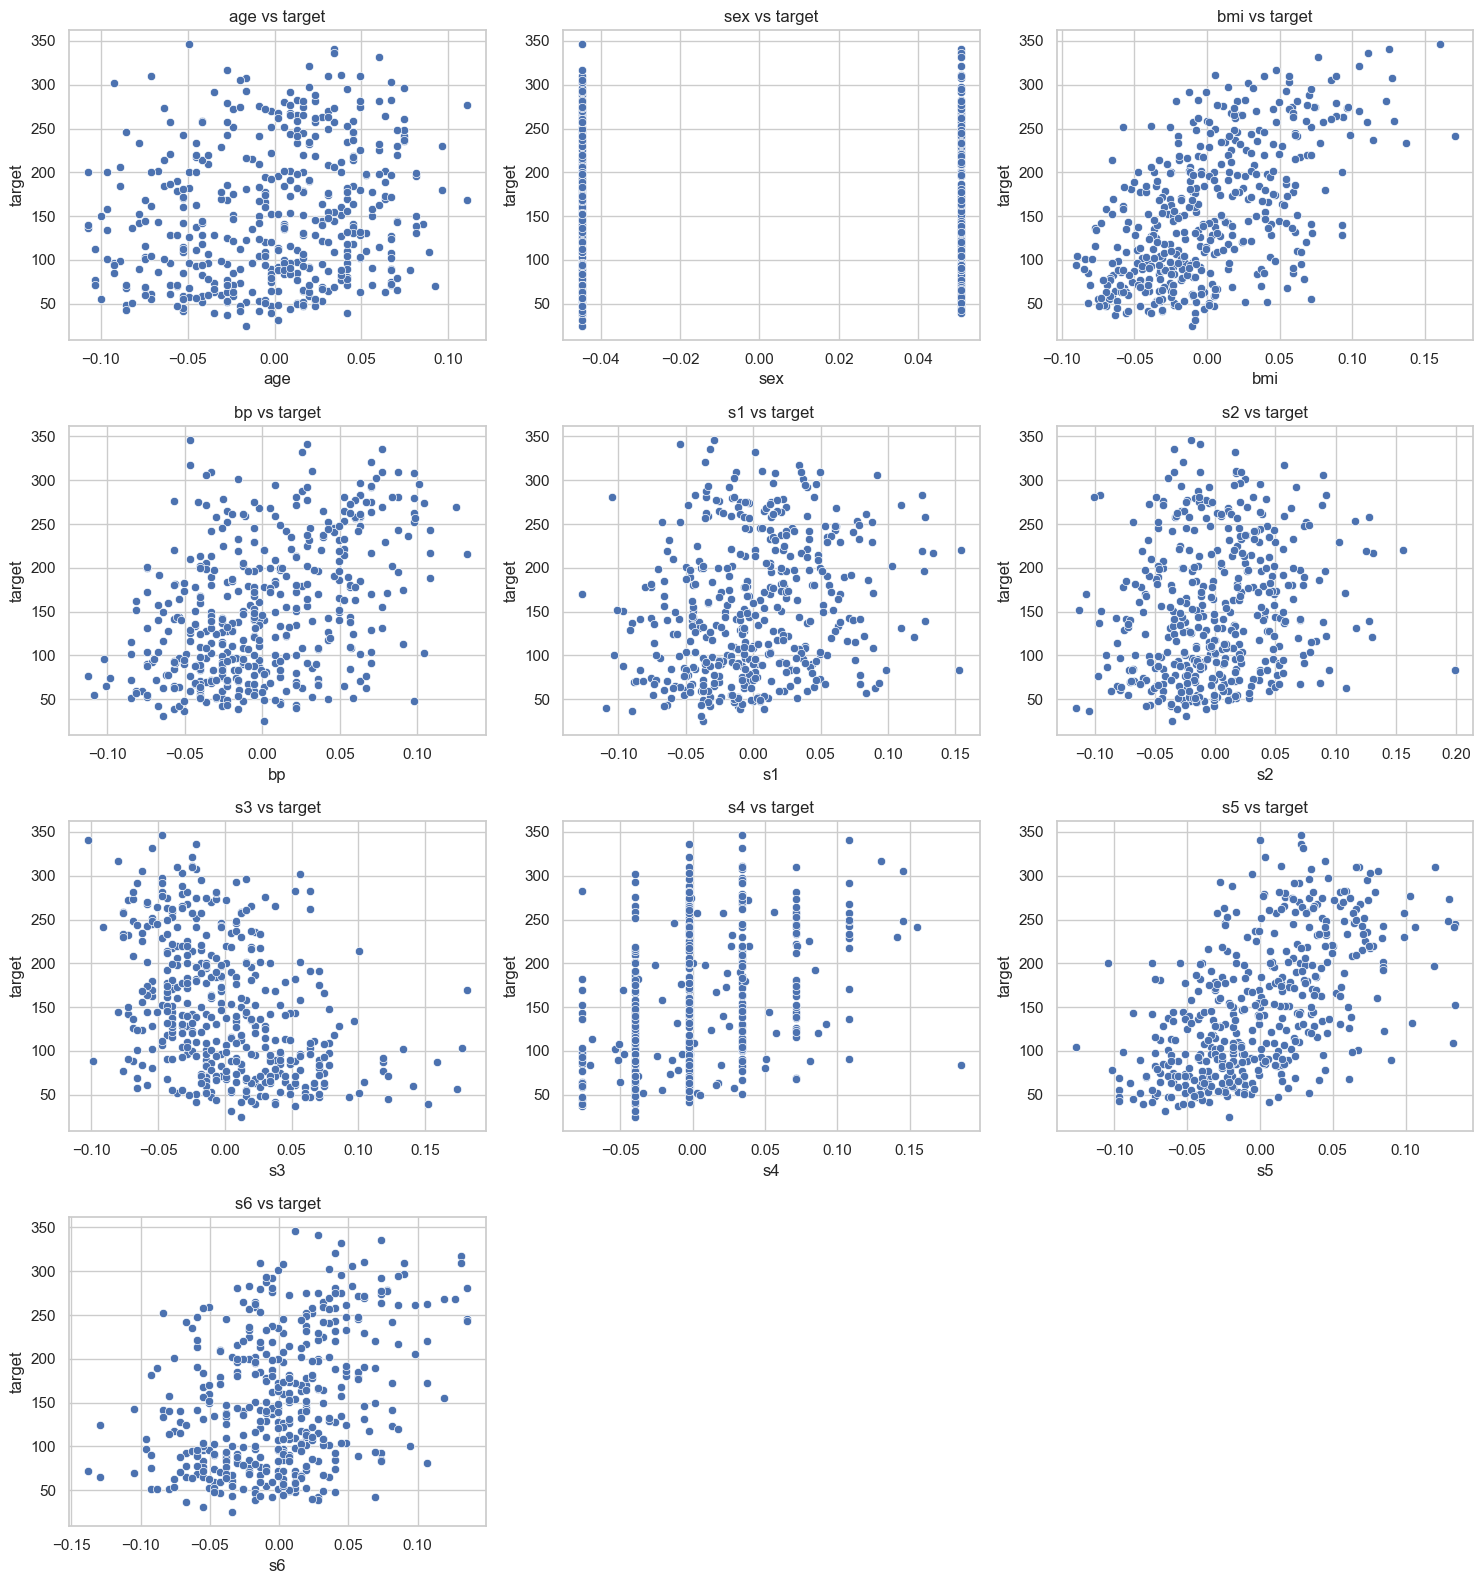

In [17]:
# Scatter plot: features vs target variable

def features_plot(df):
    features = df.columns.drop('target')
    n = len(features)
    
    cols = 3
    rows = math.ceil(n / cols)
    
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
    axes = axes.flatten()  # Flatten in case of multiple rows
    
    for i, feature in enumerate(features):
        sns.scatterplot(x=feature, y='target', data=df, ax=axes[i])
        axes[i].set_title(f"{feature} vs target")
    
    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Usage
features_plot(df)

`Observations from scatter plots:`

- The BMI has the highest positive correlation with  the target variable
- The sex has little correlation with the target variable compared to the rest.
- The s3 has the highest negative correlation with the target variable

These confirm the values from the numerical correlation calculation 

## Preprocessing

In [20]:
X = df.drop('target', axis=1)
y = df['target']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f"{X_train.shape[0]} records for training with the remaining {X_test.shape[0]} for testing our model")

353 records for training with the remaining 89 for testing our model


## Machine Learning

### Model Selection for the scikit-learn Diabetes Dataset

#### **Chosen Model**
**LinearRegression**
- Selected as the **only model** to keep the workflow simple and interpretable.  
- Provides a clear mathematical relationship between input features and the target variable.  
- Since the diabetes dataset is already **small, clean, and standardized**, Linear Regression can perform reasonably well without heavy preprocessing.  
- Easy to explain and communicate results, which is important in a **medical-related context**.

In [24]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = linear.predict(X_test)

## Evaluation

### Chosen Metric

RMSE
- Expresses prediction error in the same units as the target, making it intuitive to understand.  
- Penalizes large errors more than small ones, which is useful in a medical context where big mistakes can have serious implications.
  
R² Score
- Measures how much of the variance in the target variable is explained by the model’s predictions.  
- Scale-independent, making it easier to interpret compared to raw error values.  
- A high R² indicates the model captures the underlying patterns in the data well.  
- In this small dataset, R² is a quick way to judge whether the model is learning anything beyond random guessing.



In [28]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(r2_score(y_test, y_pred))

58.517171277315626
0.3322332173106183


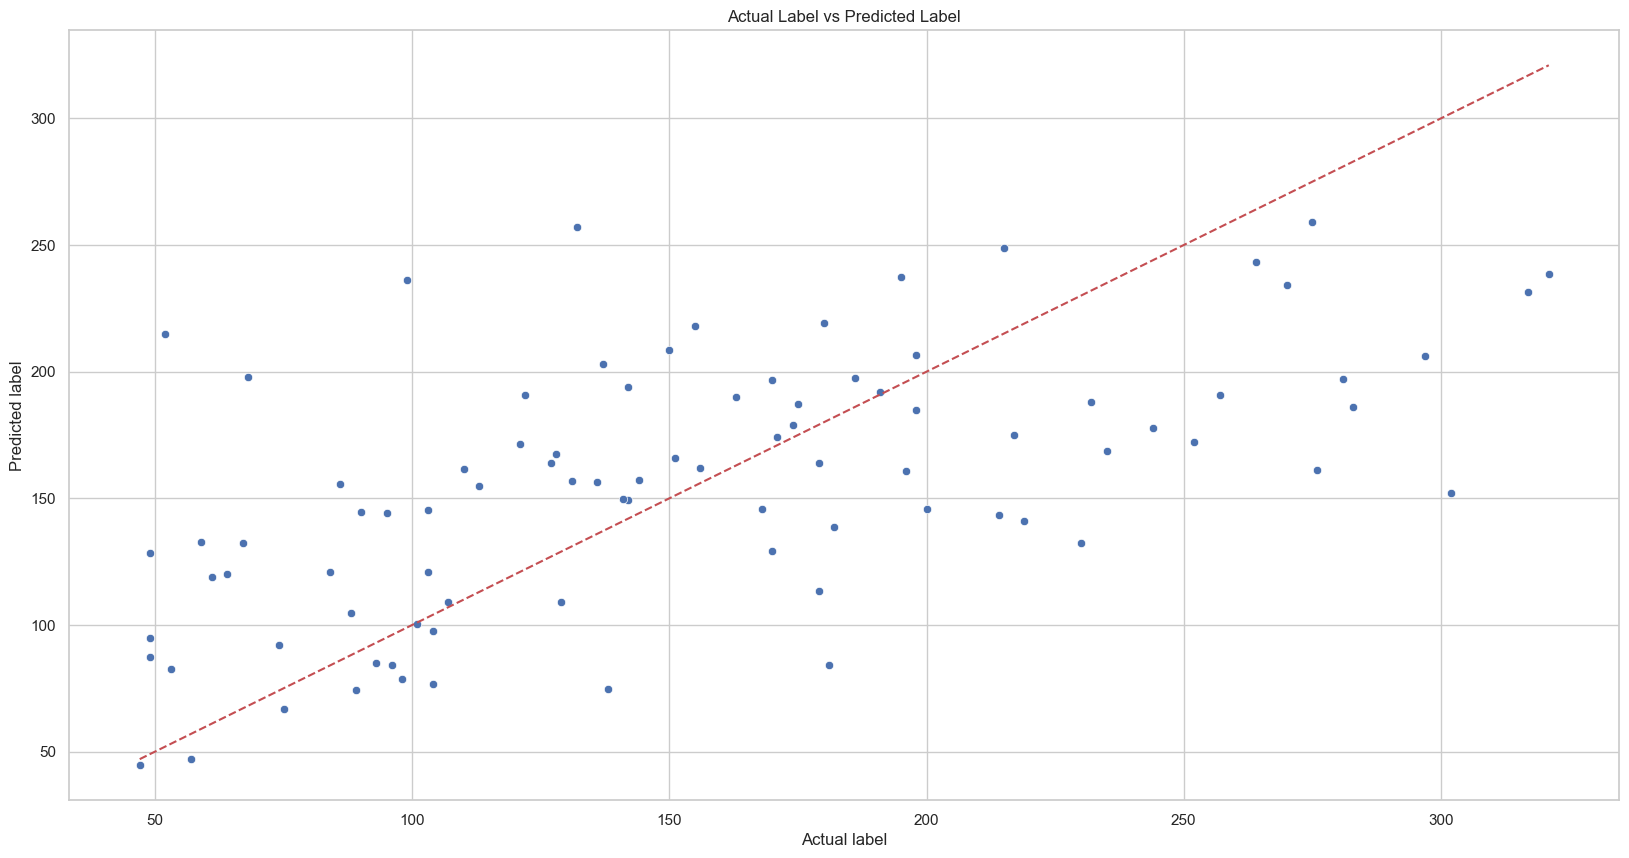

In [29]:
# plot actual vs predicted
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.title("Actual Label vs Predicted Label")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.show()